In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import geopandas as gpd
import folium
import contextily as ctx
import plotly.graph_objects as go
import plotly.express as px 
from shapely.geometry import Point
from plotly.subplots import make_subplots



In [20]:
import os
print(os.getcwd())

d:\AI\epoch


In [21]:
data = pd.read_csv("clustering_data.csv")
MP_data = data[data["StateName"].str.upper()=="MADHYA PRADESH"]
#print(MP_data)

MP_data["Longitude"] = pd.to_numeric(MP_data["Longitude"], errors='coerce')
MP_data["Latitude"] = pd.to_numeric(MP_data["Latitude"], errors='coerce')


MP_data = MP_data.dropna(subset=["Longitude","Latitude"])
MP_data = MP_data.drop_duplicates(subset=["Longitude","Latitude"])


X = MP_data[["Longitude","Latitude"]].values
# print(X)



C:\Users\RISHIT\AppData\Local\Temp\ipykernel_22616\4147230859.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("clustering_data.csv")
C:\Users\RISHIT\AppData\Local\Temp\ipykernel_22616\4147230859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MP_data["Longitude"] = pd.to_numeric(MP_data["Longitude"], errors='coerce')
C:\Users\RISHIT\AppData\Local\Temp\ipykernel_22616\4147230859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

# Main logic and Clustering 

In [22]:
def euclidian_distance(a,b):            #Defining the euclidian distance function
    return np.sqrt(np.sum((a-b)**2))

def K_means_clustering(X,k,max_loops):
    K_indices = np.random.choice(len(X),k,replace=False)                    #Choosing Random K centres for the cluster.
    K_centres = X[K_indices]
    cluster_history=[]


    for _ in range(max_loops):
        closest_centre = []

        for x in X:
            K_distances = [euclidian_distance(x,k) for k in K_centres]      #Calulating distance of eack point with respect to each k centres.
            closest_centre.append(np.argmin(K_distances))                   #assigning the index of the closest center to a point x in X.


        clusters = [[] for _ in range(k)]
        refined_centers = []


        for i in range(k):
            clusters[i]=np.array([X[j] for j in range(len(X)) if i==closest_centre[j]])  ##Making clusters for eack k centres with the points assigned to them.


            """recalculating the k centers and updating it, keeping the centers as it is if no point assigned to it."""

            if(len(clusters[i])>0):
                refined_centers.append(np.mean(clusters[i],axis=0))
            else:
                refined_centers.append(K_centres[i])
            
        
        refined_centers = np.array(refined_centers)


        """Stopping the process if the previous and new centers are close enought or if maximum numer of iterations have been done, 
           the tolerance of the closeness could also be changed if required """
        

        if(np.allclose(K_centres,refined_centers)):
            print("clusters formed")
            break

        K_centres = refined_centers

        cluster_history.append((closest_centre,refined_centers))
    

    return K_centres,clusters,closest_centre,cluster_history

# Implementation & Cluster Visualization

clusters formed


c:\Users\RISHIT\miniconda3\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


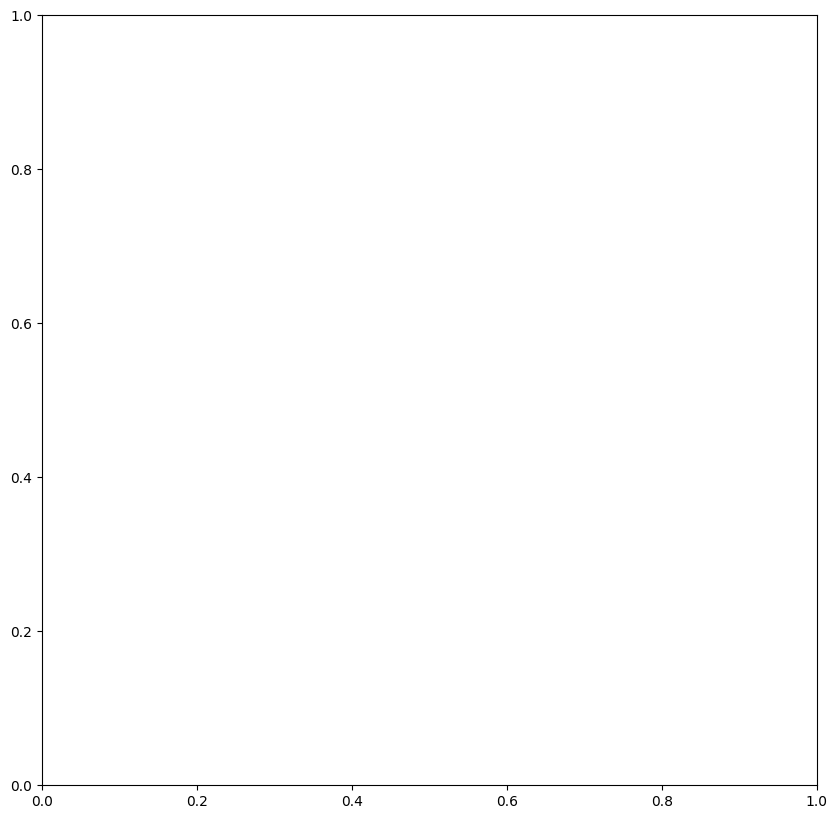

In [23]:
k = 5
_, _, _, cluster_history = K_means_clustering(X, k=k, max_loops=20)

# ------------------------- Animation over MP map -------------------------
def make_gdf(points):
    return gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in points], crs="EPSG:4326").to_crs(epsg=3857)

X_gdf = make_gdf(X)
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

def update(frame):
    ax.clear()
    assignments, centers = cluster_history[frame]
    for i in range(k):
        cluster_points = [X[j] for j in range(len(X)) if assignments[j] == i]
        if cluster_points:
            gdf = make_gdf(cluster_points)
            gdf.plot(ax=ax, color=colors[i % len(colors)], markersize=15, label=f"Cluster {i}")

    centers_gdf = make_gdf(centers)
    centers_gdf.plot(ax=ax, color='black', marker='x', markersize=100)

    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_title(f"K-Means Clustering on MP Map - Step {frame + 1}")
    ax.axis('off')
    ax.legend(loc='upper right')

ani = FuncAnimation(fig, update, frames=len(cluster_history), interval=1000, repeat=False)
plt.show()

c:\Users\RISHIT\miniconda3\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


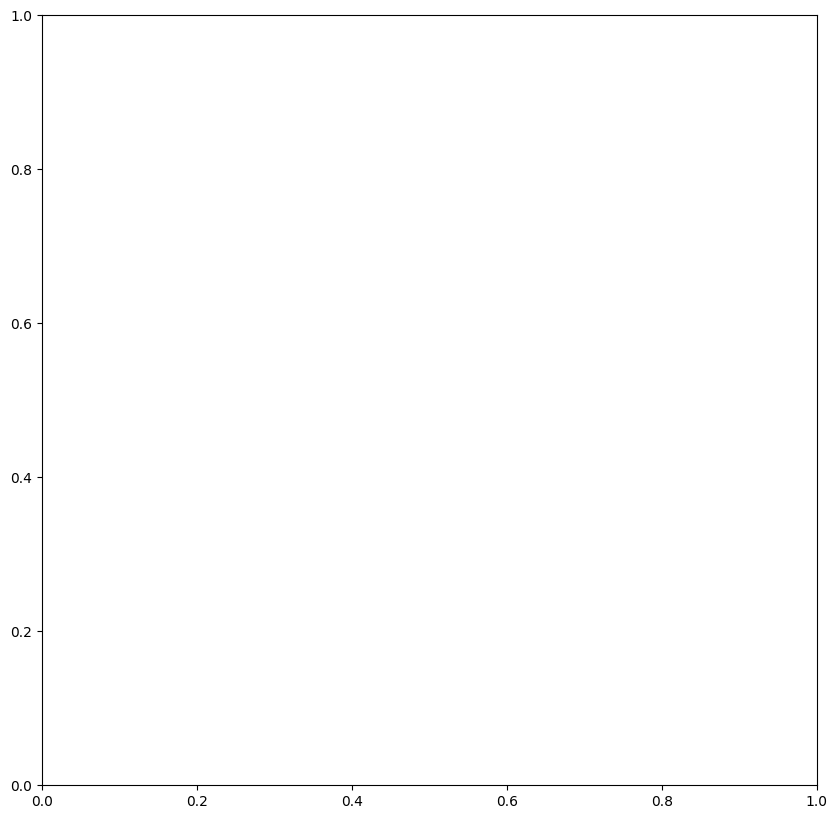

In [25]:

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.animation import FuncAnimation
import contextily as ctx

# Load data properly
data = pd.read_csv("clustering_data.csv", dtype={'Longitude': 'str', 'Latitude': 'str'}, low_memory=False)
data = data[data["StateName"].str.upper() == "MADHYA PRADESH"]

data["Latitude"] = pd.to_numeric(data["Latitude"], errors='coerce')
data["Longitude"] = pd.to_numeric(data["Longitude"], errors='coerce')

data = data.dropna(subset=["Latitude", "Longitude"])
data = data.drop_duplicates(subset=["Latitude", "Longitude"])
X = data[["Longitude", "Latitude"]].values

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans(X, k=5, max_iters=20):
    centers = X[np.random.choice(len(X), k, replace=False)]
    history = []

    for _ in range(max_iters):
        labels = [np.argmin([euclidean_distance(x, c) for c in centers]) for x in X]
        new_centers = []

        for i in range(k):
            cluster_points = X[np.array(labels) == i]
            if len(cluster_points) > 0:
                new_centers.append(cluster_points.mean(axis=0))
            else:
                new_centers.append(centers[i])

        history.append((labels.copy(), np.array(new_centers)))
        if np.allclose(centers, new_centers):
            break
        centers = np.array(new_centers)

    return history

# Run clustering
history = kmeans(X, k=5, max_iters=15)

# Geo helper
def to_gdf(points):
    return gpd.GeoDataFrame(geometry=[Point(p) for p in points], crs="EPSG:4326").to_crs(epsg=3857)

base_gdf = to_gdf(X)

# Plot + Animate
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan']

def update(frame):
    ax.clear()
    labels, centers = history[frame]
    for i in range(5):
        cluster_points = X[np.array(labels) == i]
        if len(cluster_points) > 0:
            gdf = to_gdf(cluster_points)
            gdf.plot(ax=ax, color=colors[i % len(colors)], markersize=20, label=f"Cluster {i}")
    to_gdf(centers).plot(ax=ax, color='black', marker='x', markersize=100, label="Centers")
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_title(f"K-Means on MP Map - Frame {frame+1}")
    ax.axis('off')
    ax.legend()

ani = FuncAnimation(fig, update, frames=len(history), interval=1000, repeat=False)
plt.show()  # <--- animation stays alive because ani is stored
